In [2]:
from helper import getData, getLogChannels, getChannelValuesAsDict, getTime, getXaxis
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [3]:
data_dir = "../../../../../data/MIT_cca_calibration/"

In [6]:
# check if data_dir exists
if not glob(data_dir):
    print("Data directory does not exist")
else:
    files_paths = glob(data_dir + "*/*/*/*.hdf5")
files_paths = sorted(files_paths)

In [7]:
measurements = {}
for file_path in files_paths:
    name = file_path.split("/")[-1].split(".")[0]
    measurements[name] = {}

    time = getTime(file_path) 
    print("--- ",time,"\t",name)
    log_channels = getLogChannels(file_path)

    measurements[name]['data'] = {}
    for channel in log_channels:
        measurements[name]['data'][channel['name'].decode()] = getData(file_path, channel['name'])
    
    measurements[name]["xaxis"] = getXaxis(file_path, channel['name']) # Here we are assuming that all logchannels have the same x-axis
    measurements[name]["time"] = time
    measurements[name]["channel_values"] = getChannelValuesAsDict(file_path)
    measurements[name]["log_channels"] = log_channels
    

---  2024-02-17 16:18:20 	 VNA_S22_QWA_WGT42
---  2024-02-17 16:26:23 	 VNA_S22_QWA_shortplate
---  2024-02-17 17:57:02 	 VNA_Sall_QKY_QWA_QWA_WGT42
---  2024-02-17 18:17:27 	 VNA_Sall_QKY_WG_LNF_2
---  2024-02-17 16:42:57 	 VNA_Sall_QWA_LNFWG
---  2024-03-07 17:46:35 	 ESA_short_LNF_Lotusamp_on
---  2024-03-07 17:38:23 	 ESA_terminator_LNF_Lotusamp_off
---  2024-03-07 17:34:42 	 ESA_terminator_LNF_Lotusamp_on
---  2024-03-07 17:12:40 	 VNA_S21l_lotusamp
---  2024-03-07 18:06:36 	 VNA_Sall_QWA_LNF_lotus
---  2024-03-21 21:03:01 	 ccaCavity_prototype
---  2024-03-26 18:59:29 	 ccaCavity_prototype_1kHzIF_avg20_step500kHz


In [37]:
# Explore dataset:
data_set = "VNA_Sall_QWA_LNFWG"

for key in measurements[data_set].keys():
    print("\n", key, ":", measurements[data_set][key])


 data : {'E5080B - S11': array([[ 0.02819445+0.04299687j,  0.02830295+0.04220623j,
         0.02690814+0.04117694j, ..., -0.04320735-0.01040643j,
        -0.04369516-0.00960292j, -0.04236076-0.0094848j ]]), 'E5080B - S22': array([[-0.16506734+0.16959395j, -0.16189174+0.16873875j,
        -0.16288956+0.16904856j, ...,  0.18349347+0.03174195j,
         0.18330812+0.03070322j,  0.18382446+0.02923493j]]), 'E5080B - S12': array([[-27.47051048+25.99188232j, -27.46701241+25.81638527j,
        -27.45792389+25.71411514j, ...,  -3.72339344-34.12799835j,
         -3.71774244-34.04352188j,  -3.84939289-34.0670166j ]]), 'E5080B - S21': array([[ 0.00176637-0.00026535j,  0.00174881-0.00028457j,
         0.00180227-0.00024863j, ..., -0.00237627+0.0015733j ,
        -0.00235429+0.00157883j, -0.00235747+0.00155198j]])}

 xaxis : [2.3000e+10 2.3001e+10 2.3002e+10 ... 2.6998e+10 2.6999e+10 2.7000e+10]

 time : 2024-02-17 16:42:57

 channel_values : {'E5080B - # of averages': 4.0, 'E5080B - # of points': 

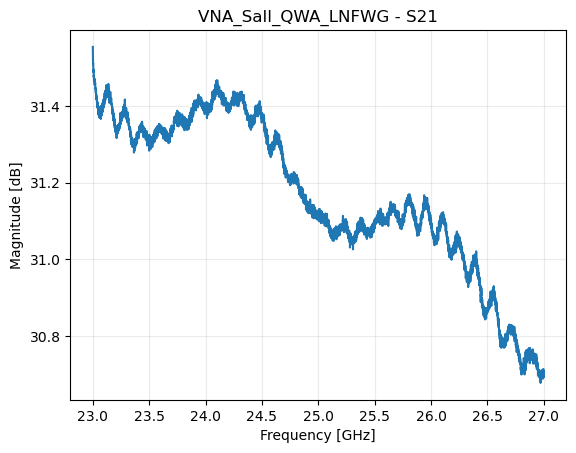

In [44]:
#plot S21 of the dataset

fig, ax = plt.subplots()

S21 = measurements[data_set]['data']['E5080B - S12'][0]
frequencies = measurements[data_set]['xaxis']

ax.set_title(data_set+" - S21")
ax.set_xlabel("Frequency [GHz]")
ax.set_ylabel("Magnitude [dB]")
ax.plot(frequencies/1e9, 20*np.log10(np.abs(S21)))
ax.grid(alpha=0.25)